In [27]:
import numpy as np
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})
#%config InlineBackend.figure_format='retina'

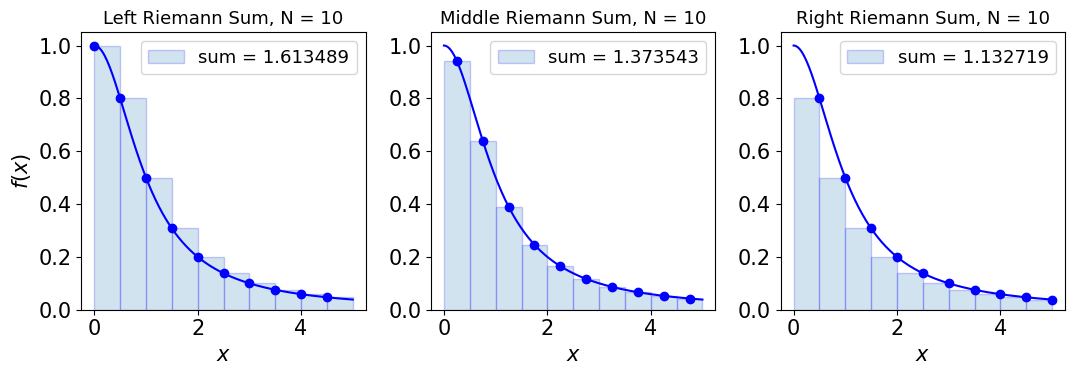

In [13]:
def f(x):
    return 1 / (1 + x*x)

def coord(x):
    return x, f(x)

a, b, N = 0, 5, 10 #인수 정하기 a,b는 간격, N은?
curve = coord(np.linspace(a, b, 200))

#partition
partition = np.linspace(a, b, N + 1) #간격을 N+1로 분할
left_x = partition[:-1] 
right_x = partition[1:]
middle_x = (left_x + right_x) / 2
delta_x = right_x - left_x #dx 의미

#Riemann sums
left_sum = sum(f(left_x) * delta_x)
right_sum = sum(f(right_x) * delta_x)
middle_sum = sum(f(middle_x) * delta_x)

# left sum
plt.figure(figsize=(11, 4))
plt.subplot(1, 3, 1)
plt.plot(*curve, 'b')
plt.plot(*coord(left_x), 'bo')
plt.bar(*coord(left_x), label=f"sum = {left_sum:.6f}",
        align='edge', width=delta_x[0],
        alpha=0.2, edgecolor='b')
plt.title(f'Left Riemann Sum, N = {N}', fontsize=13)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend(fontsize=13)

# Middle sum
plt.subplot(1, 3, 2)
plt.plot(*curve, 'b')
plt.plot(*coord(middle_x), 'bo')
plt.bar(*coord(middle_x), label=f"sum = {middle_sum:.6f}",
        width=delta_x[0], alpha=0.2, edgecolor='b')
plt.title(f'Middle Riemann Sum, N = {N}', fontsize=13)
plt.xlabel("$x$")
plt.legend(fontsize=13)

# right sum
plt.subplot(1, 3, 3)
plt.plot(*curve, 'b')
plt.plot(*coord(right_x), 'bo')
plt.bar(*coord(right_x), label=f"sum = {right_sum:.6f}",
        align='edge', width=-delta_x[0],
        alpha=0.2, edgecolor='b')
plt.title(f'Right Riemann Sum, N = {N}', fontsize=13)
plt.xlabel("$x$")
plt.legend(fontsize=13)

plt.tight_layout()
plt.show()



In [16]:
import sympy
#실제로 sympy.symbols로 합 구하기.
x, y = sympy.symbols('x y')
f = 1 / ( 1 + x**2 )
f

1/(x**2 + 1)

In [36]:
#직접 sympy와 math를 이용하여 atan값을 구할 수 있다.
a = sympy.integrate(f , (x ,0 ,5))
a
math.atan(5)

1.373400766945016

In [61]:
def riemann_sum(f, partition, method = 0):
    """Compute the {left|middle|right} Reimann sum of f(x) given the partition.
    
    :param f:
        A function of one variable 
    :param partition:
        A sequence of x partition points; the length must be greater than or equal to 2
    :param method:
        Either -1 (left sum), 0 (middle sum), or 1 (right sum)
        The default is 0.
    """
    assert method == 0 or method == -1 or method == 1, f'Unrecognized method={method}'
    #assert가 false 가 되면 Unrecognized method가 뜨게 하여, 함수 내의 오류가 아님을 보여준다. 
        
    dx = [r - l for (l, r) in zip(partition[:-1], partition[1:])]
    N  = len(partition) - 1
    
    li = 0 + int(method > 0) #left
    ri = 1 - int(method < 0) #right
    
    
    #이해가 안되는 부분...
    xi = [0.5 * (r + l) for (l, r) in
          zip(partition[li:(li+N)], 
              partition[ri:(ri+N)])
         ] #mid
    
    return sum(f(x) * d for (x, d) in zip(xi, dx))

In [64]:
a = range(1, 10)
for xy in zip(a[:-1] , a[1:]):
    print(xy)

(1, 2)
(2, 3)
(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)


실제로 수를 대입해보자

In [65]:
result = [
    riemann_sum(np.sin, np.linspace(0, np.pi/2, 1001), method=method)
    for method in (-1, 0, 1)
]

print("left_sum = {}, middle_sum = {}, right_sum = {}"
      .format(*result)
     ) #method -1, 0, 1에 대한 riemann sum 결과 값을 각각에 집어 넣는다.

print("left_err = {:.12e}, middle_err = {:.12e}, right_err = {:.12e}"
      .format(*[abs(x - 1) for x in result])
     ) #12째 자리까지만,

left_sum = 0.9992143962198355, middle_sum = 1.0000001028083858, right_sum = 1.0007851925466307
left_err = 7.856037801645e-04, middle_err = 1.028083858046e-07, right_err = 7.851925466307e-04


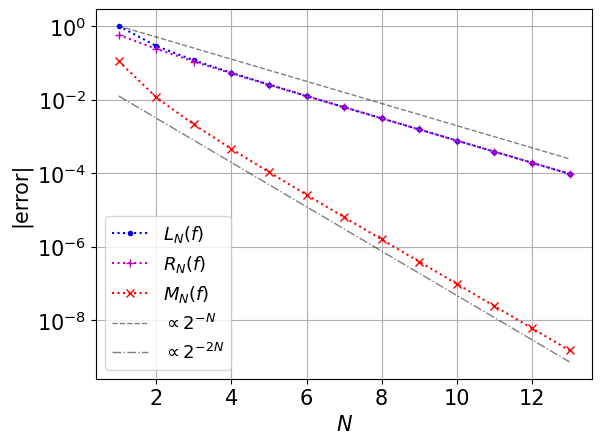

In [67]:
N = range(1, 14)
acc = [
    [abs(1 - riemann_sum(np.sin, np.linspace(0, np.pi/2, 2**i), method=method))
     for method in (-1, 0, 1)]
    for i in N
]
acc = np.array(acc).transpose()

plt.figure()

#얘도 제대로 이해가 안됨.
plt.semilogy(N, acc[0], 'b:.', label="$L_N(f)$")
plt.semilogy(N, acc[2], 'm:+', label="$R_N(f)$")
plt.semilogy(N, acc[1], 'r:x', label="$M_N(f)$")
plt.semilogy(N, [2*2**(-1*x) for x in N], '--k', alpha=.5, lw=1, label="$\\propto 2^{-N}$")
plt.semilogy(N, [2**(-2*x)/20 for x in N], '-.k', alpha=.5, lw=1, label="$\\propto 2^{-2N}$")
plt.legend(fontsize=13)
plt.grid()
plt.xlabel("$N$")
plt.ylabel("|error|")

plt.show()

Exercises 

In [71]:
#exact_value 구하는 방법은 위의 방식대로 구할 수 있는 걸 report엔 작성하기

In [69]:
exact_value = np.pi
target_acc = 10**(-5)

current_acc = 1
N = 2
mid_sum = 0

while current_acc > target_acc and N < 200:
    mid_sum = riemann_sum(lambda x: 4/(1 + x*x), np.linspace(0, 1, N),
                         method = 0)
    current_acc = abs(exact_value - mid_sum)
    N += 1 
    
print(f"approximate value = {mid_sum}, number of partition points = {N}")

approximate value = 3.1416024992104568, number of partition points = 94


In [70]:
exact_value = np.log(2)
target_acc = 10**(-7)

current_acc = 1
N = 2
mid_sum = 0
while current_acc > target_acc and N < 1000:
    mid_sum = riemann_sum(lambda x: 1/x, np.linspace(1, 2, N), method=0)
    current_acc = abs(exact_value - mid_sum)
    N += 1
    
print(f"approximate value = {mid_sum}, number of partition points = {N}")

approximate value = 0.6931470809107801, number of partition points = 562
